# TASK 1 - OBJECTIVE OF SUPERVISED LEARNING 

#### PREDICT THE PERCENTAGE OF AN STUDENT BASED ON NUMBER OF HOURS THE STUDENT HAS STUDIED

## IMPORTING IMPORTANT LIBRAIRES FOR THE TASK

In [1]:
# Importing Numeric Python
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Data Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Linear Regression Libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Regularization Technique
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# GridSearch and Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## IMPORTING THE DATAFRAME

In [4]:
df = pd.read_csv('hours_score.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 1. DOING NULL VALUE ANALYSIS

In [6]:
# doing null value analysis
df.isnull().sum()/len(df)*100

Hours     0.0
Scores    0.0
dtype: float64

### 2. DATA TYPE OF EACH COLUMNS

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


INTERPRETATION : WE CAN SEE THAT BOTH COLUMNS ARE NUMERIC DATA TYPE

### 3. CORRELATION MATRIX AND SCATTER PLOT 

In [15]:
# As both column are numeric we can do correlation check
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


INTERPRETATION : 
1. Both Columns are highly correlated to Each Other, hence we can conclude that Scores Depend on Number of Hours we have Studied

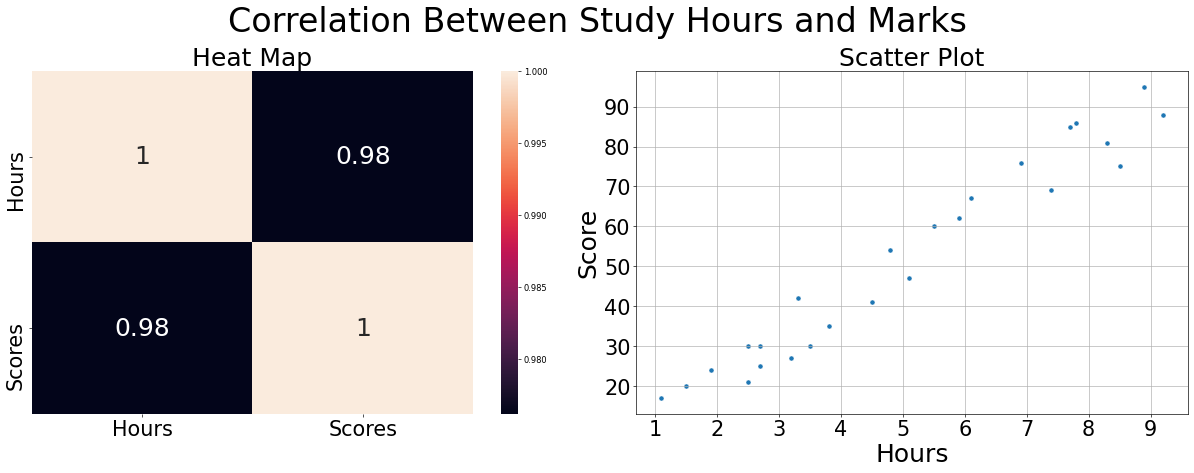

In [41]:
# we can check above statement by doing Data Visualization with relevant Plots like Heat Map and Scatterplot
plt.figure(figsize = (20,8),dpi = 60)

# Title of Subplots
plt.suptitle('Correlation Between Study Hours and Marks',size = 40)

# heatmap
plt.subplot(1,2,1)
sns.heatmap(df.corr(),annot=True,annot_kws={'size':30})

# title
plt.title('Heat Map',size = 30)
# x axis 
plt.xticks(size = 25)
# y axis
plt.yticks(size = 25)

# scatterplot
plt.subplot(1,2,2)
sns.scatterplot(data =df, x = 'Hours',y = 'Scores')
# title
plt.title('Scatter Plot',size = 30)
# x axis 
plt.xlabel('Hours',size = 30)
plt.xticks(size = 25)
# y axis
plt.ylabel('Score',size = 30)
plt.yticks(size = 25)

# show
plt.tight_layout()
plt.grid(True)
plt.show()

INTERPRETATION : 
1. From This Also We can See Hours of Study and Scores are strongly Correlated to Each other.
2. Hence We can Conclude That More We Put in Time For Study Better and Higer Will Be Our Score

### 4. SPLITING TRAIN AND TEST DATA OF THE DATA FRAME

In [83]:
# DIVIDING DATA INTO TRAIN AND TEST DATA
# SPLITING DATA INTO 20% DATA AS TEST AND 80% DATA AS TRAIN --> WE WILL HAVE MORE DATA TO TRAIN ON
x_train, x_test , y_train, y_test = train_test_split(df['Hours'],df['Scores'],test_size=0.2,random_state=10 )

# SHAPE OF TRAIN AND TEST DATA
print('Shape of train data ',x_train.shape)
print('Shape of the test data ',x_test.shape)

Shape of train data  (20,)
Shape of the test data  (5,)


CHECKING IF THE DATA IS SPLIT IN CORRECT WAY

In [82]:
# To Check If We Have Split Data Correctly we need to check Mean and Standard Deviation of the Train and Test Data
train_data_mean = x_train.mean()
test_data_mean = x_test.mean()
train_data_std = x_train.std()
test_data_std = x_test.std()

# Creating Data Frame
df_split = pd.DataFrame(data={'Train':[train_data_mean,train_data_std],
                         'Test':[test_data_mean,test_data_std]},
                        index=['Mean','Standard Deviation'])
df_split

,Train,Test
Mean,4.950000,5.069231
Standard Deviation,2.652443,2.509112


### 4. Making the Model

SIGNIFICANT POINTS BEFORE BUILDING MODEL

1. DEPENDENT VARIABLE - Variable Which We are Predicting is Dependent Variable. Denoted by Y
2. INDEPENDENT VARIABLE - Variable Which We are using to Predict Dependent Variable is Know as Independent Variable.Denoted by X 
3. SIMPLE LINEAR REGRESSION - SLR is the Regression Model in which we have Only ONE Independent Varible. So in we are going for SLR as we have one independent variable that is number of hours of study

#### METHOD ORDINARY LEAST SQUARE REGRESSION

In [92]:
# Ordinary Least Square Regression
x_constant = sm.add_constant(x_train)
ols_model = sm.OLS(y_train,x_constant).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     411.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           7.57e-14
Time:                        15:39:18   Log-Likelihood:                -61.593
No. Observations:                  20   AIC:                             127.2
Df Residuals:                      18   BIC:                             129.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6500      2.886      0.918      0.371      -3.414       8.714
Hours          9.8143      0.484     20.280      0.000       8.798      10.831
==============================================================================
Omnibus:                        2.955   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                1.687
Skew:                          -0.447   Prob(JB):                        0.430
Kurtosis:                       1.893   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
rsquare_value_ols = ols_model.rsquared
adj_rsquare_ols = ols_model.rsquared_adj

# difference between rsquare and adjusted rsquare value
print(f'Adjusted and R Square Value {rsquare_value_ols-adj_rsquare_ols}')

Adjusted and R Square Value 0.0023294319749767034


INTERPRETATION:
1. DIFFERENCE VALUE BETWEEN ADJUSTED AND R SQUARE VALUE IS VERY CLOSE TO ZERO HENCE MODEL IS VERY OPTIMAL MODEL

In [104]:
# TEST
# ADDING CONSTANT
x_constant_test = sm.add_constant(x_test)
test_prediction = ols_model.predict(x_constant_test)
test_prediction

5     17.371423
1     52.702923
13    35.037173
2     34.055743
12    46.814340
dtype: float64

In [103]:
# DATAFRAME FOR THE TEST AND PREDICTION
test_df = pd.DataFrame(data= {'Actual':y_test,
                              'Prediction':test_prediction})
test_df['Difference'] = test_df['Actual'] - test_df['Prediction']
test_df

,Actual,Prediction,Difference
5,20,17.371423,2.628577
1,47,52.702923,-5.702923
13,42,35.037173,6.962827
2,27,34.055743,-7.055743
12,41,46.814340,-5.814340


##### 5. CREATING FUNCTION TO PREDICT THE MARKS

In [93]:
# Creating User Defined Function
def study_hours(n):
    # adding constant
    cons = [1,n]
    # Using Simple Linear Regression OLS Model
    prediction = ols_model.predict(cons)
    return prediction

In [95]:
num = float(input('Please Mention Studying Hours : '))
score = round(study_hours(num)[0],2)
print(f'Studying Hours are {num} score will be {score}')

Please Mention Studying Hours : 9.25
Studying Hours are 9.25 score will be 93.43
